<a href="https://colab.research.google.com/github/MehmetCanYildirim/Projects/blob/main/Simple_CNN_classification_fashion_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential

print(tf.__version__)

In [3]:
fashion_mnist_datasets = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist_datasets.load_data()

In [4]:
classnames = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

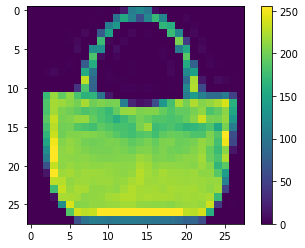

In [6]:
plt.figure()
plt.imshow(X_train[100])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
X_train = X_train/255.0
X_test = X_test/255

In [10]:
X_test.shape

(10000, 28, 28)

In [16]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [46]:
history = model.fit(x = X_train, y=y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
938/938 [==============================] - 2s 3ms/step - loss: 0.1722 - accuracy: 0.9387 - val_loss: 0.3719 - val_accuracy: 0.8759
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1714 - accuracy: 0.9393 - val_loss: 0.3573 - val_accuracy: 0.8821
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1676 - accuracy: 0.9405 - val_loss: 0.3668 - val_accuracy: 0.8798
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1655 - accuracy: 0.9416 - val_loss: 0.3643 - val_accuracy: 0.8818
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1646 - accuracy: 0.9420 - val_loss: 0.3682 - val_accuracy: 0.8790
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1621 - accuracy: 0.9418 - val_loss: 0.3681 - val_accuracy: 0.8828
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1590 - accuracy: 0.9441 - val_loss: 0.3773 - val_accuracy: 0.8779
Epoch 

In [48]:
test_loss, test_accuracy = model.evaluate(x=X_test, y=y_test, verbose=2)

313/313 - 0s - loss: 0.3866 - accuracy: 0.8789


In [49]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

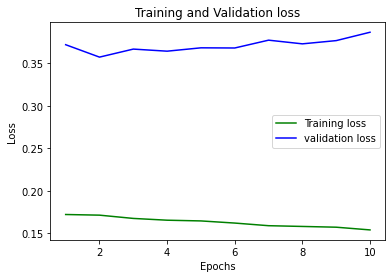

In [51]:

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()





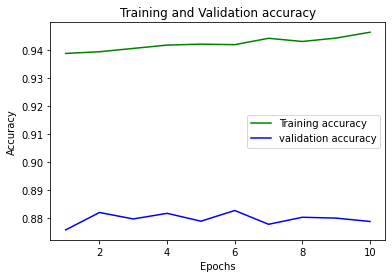

In [52]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()